In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [8]:
maxquant_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/maxquant/allPeptides.txt', sep='\t')

In [9]:
len(maxquant_df)

328862

In [10]:
maxquant_df.head()

,Raw file,Charge,m/z,Mass,Resolution,Number of data points,Number of frames,Number of isotopic peaks,Isotope correlation,Mass fractional part,...,Min frame index,Max frame index,Ion mobility index,Ion mobility index length,Ion mobility index length (FWHM),Intensity,Intensities,Number of pasef MS/MS,Pasef MS/MS IDs,MS/MS scan number
0,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,326.37791,325.37063,24329.390330,3048,20,2,0.999609,0.370635,...,5137,5156,363,54,27,31429.0,NaN,0,NaN,NaN
1,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,312.32607,311.31879,24234.331350,19515,75,2,0.992528,0.318792,...,5351,5425,501,51,21,81118.0,NaN,0,NaN,NaN
2,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,316.28438,315.27711,24449.285122,706,7,2,0.999514,0.277105,...,5112,5118,549,75,27,36051.0,NaN,0,NaN,NaN
3,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,307.09608,306.08880,24469.582565,7633,22,2,0.998656,0.088801,...,4935,4956,651,111,30,295110.0,NaN,0,NaN,NaN
4,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,316.16858,315.16130,24514.638897,108,3,2,0.999752,0.161303,...,5032,5034,645,21,18,7543.2,NaN,0,NaN,NaN


In [11]:
maxquant_df.columns

Index([u'Raw file', u'Charge', u'm/z', u'Mass', u'Resolution',
       u'Number of data points', u'Number of frames',
       u'Number of isotopic peaks', u'Isotope correlation',
       u'Mass fractional part', u'Mass deficit', u'Retention time',
       u'Retention length', u'Retention length (FWHM)', u'Min frame index',
       u'Max frame index', u'Ion mobility index', u'Ion mobility index length',
       u'Ion mobility index length (FWHM)', u'Intensity', u'Intensities',
       u'Number of pasef MS/MS', u'Pasef MS/MS IDs', u'MS/MS scan number'],
      dtype='object')

In [12]:
maxquant_df.rename(columns={'Number of isotopic peaks': 'isotope_count'}, inplace=True)

In [13]:
feature_list_filename = "/Users/darylwilding-mcbride/Downloads/features/HeLa_20KInt-feature-list.csv"
feature_list_df = pd.read_csv(feature_list_filename)

In [14]:
feature_list_df.head()

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_scan_lower,base_peak_scan_upper,base_peak_centroid_rt,base_peak_std_dev_rt,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper
0,1,3,1960.915588,680.366484,4013.127018,654.717577,4005.957188,4021.318195,668,688,...,668,688,4013.130741,3.845270,4005.957188,4021.318195,654.645757,0.002612,654.619261,654.675743
1,2,2,1247.602054,574.224714,1085.766969,625.127677,1075.177570,1097.628037,565,585,...,565,585,1085.746282,2.179954,1075.177570,1097.628037,624.809083,0.002324,624.778556,624.833736
2,3,2,1789.900380,379.472823,4433.432999,896.216859,4421.919624,4439.635599,367,387,...,367,387,4436.255100,2.552869,4421.919624,4439.635599,896.459161,0.003005,896.413464,896.498444
3,4,2,1405.719333,527.432220,4034.358108,704.126734,4022.496117,4044.962866,519,539,...,519,539,4034.498268,3.537136,4024.859526,4044.962866,703.867085,0.005701,703.834050,703.900983
4,5,2,2214.082282,231.310785,5002.872698,1108.270682,4991.075059,5008.786578,221,241,...,221,241,5002.369948,1.875718,4991.075059,5008.786578,1108.049241,0.003916,1107.997794,1108.087022


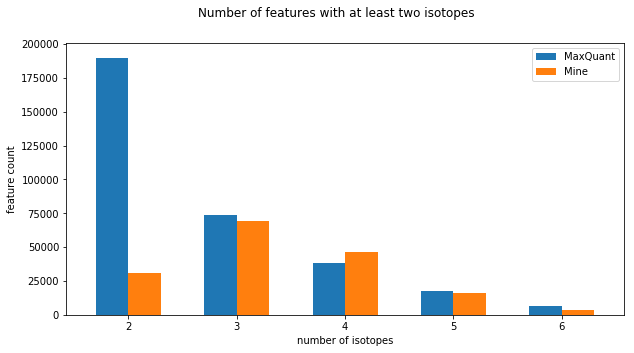

In [18]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
plt.hist([maxquant_df.isotope_count, feature_list_df.isotope_count], bins=np.arange(start=2, stop=8)-0.5, rwidth=0.6, label=['MaxQuant','Mine'])
plt.legend(loc='best')
plt.xlabel('number of isotopes')
plt.ylabel('feature count')
plt.margins(0.06)
plt.suptitle('Number of features with at least two isotopes')
# plt.title('{}'.format(feature_list_filename))
plt.show()

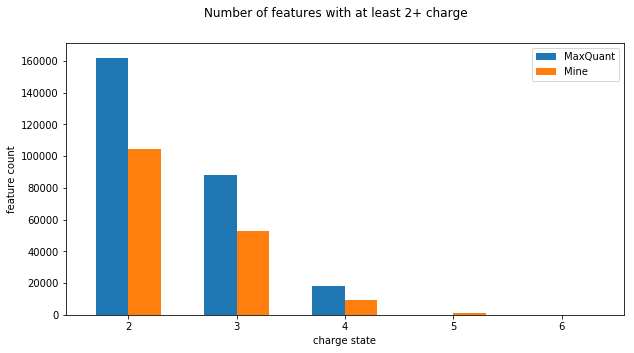

In [19]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
plt.hist([maxquant_df.Charge, feature_list_df.charge_state], bins=np.arange(start=2, stop=8)-0.5, rwidth=0.6, label=['MaxQuant','Mine'])
plt.legend(loc='best')
plt.xlabel('charge state')
plt.ylabel('feature count')
plt.margins(0.06)
plt.suptitle('Number of features with at least 2+ charge')
# plt.title('{}'.format(feature_list_filename))
plt.show()